In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# generate 2 class dataset
x, y = make_classification(n_samples=10000, n_classes=2, weights=[0.9, 0.5], random_state=42)

In [3]:
# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8)

## Naive Bayes Classifier

In [4]:
# Instantiate a Gaussian naive Bayes classifier.
gnb = GaussianNB()

# Train model
#teste = gnb.fit(y_train, x_train.ravel())
gnb.fit(x_train, y_train)

# Getting the probabilities for each class.
y_prob = gnb.predict_proba(x_test)

## Logistic Classifier

In [5]:
# Instantiate Logistic classifier.
logistic_regression = LogisticRegression(solver='lbfgs')

# Train the model.
logistic_regression.fit(x_train, y_train)

# Getting the probabilities for each class.
y_prob_lr = logistic_regression.predict_proba(x_test)

## k-NN Classifier

In [6]:
# Set parameters for grid-search
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20]}]

# Instantiate k-NN class.
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=3, n_jobs=-1)

# Train model for grid_search
grid_search.fit(x_train, y_train)

print('Optimal Hyperparameters:\n', grid_search.best_params_)
print('\nBest Score:\n', grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.3s


Optimal Hyperparameters:
 {'n_neighbors': 10, 'weights': 'distance'}

Best Score:
 0.8690000000000001


[Parallel(n_jobs=-1)]: Done  73 out of  80 | elapsed:    4.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.8s finished


In [7]:
# Create an instance of Neighbours Classifier and fit the data with best k, defining with GridSearchCV which is the best k = n_neighbors
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')

# Train model for knn
knn.fit(x_train, y_train)

# Getting the probabilities for each class.
y_prob_knn = knn.predict_proba(x_test)

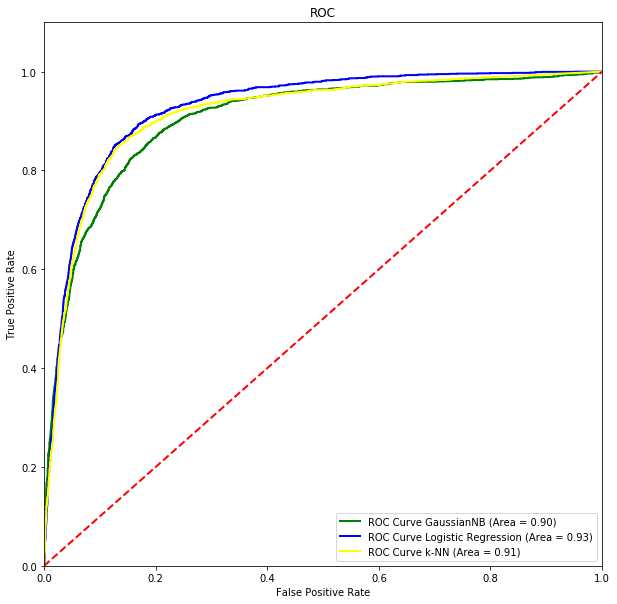

In [8]:
# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(10, 10))
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
fpr2, tpr2, _ = roc_curve(y_test, y_prob_lr[:, 1])
fpr3, tpr3, _ = roc_curve(y_test, y_prob_knn[:, 1])
Roc_auc1 = auc(fpr, tpr)
Roc_auc2 = auc(fpr2, tpr2)
Roc_auc3 = auc(fpr3, tpr3)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC Curve GaussianNB (Area = %0.2f)' % Roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=lw, label='ROC Curve Logistic Regression (Area = %0.2f)' % Roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=lw, label='ROC Curve k-NN (Area = %0.2f)' % Roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
#plt.savefig('ROC.png', dpi=600)
plt.show()

## Results
De acordo com as curvas ROC e os valores das áreas sob as curvas, o classificador que apresenta a melhor performance é o algorítmo de Regressão Logística.
